In [12]:
pip install pmdarima


In [13]:
# check pmdarima

from pmdarima.arima import auto_arima

### ARIMA


In [14]:
from IPython.core.debugger import set_trace


import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import time

plt.style.use(style="seaborn")
%matplotlib inline

In [15]:
df = pd.read_csv("/VI_IDEA.csv")
df.shape

(1228, 2)

#### Fitting the ARIMA model

In [16]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm



In [17]:
# ARIMA Model
model = sm.tsa.arima.ARIMA(df.Adj_Close, order=(1, 1, 1))
result = model.fit()
result.params

ar.L1    -0.388197
ma.L1     0.436468
sigma2    2.289739
dtype: float64

In [18]:
print(result.summary())

                               SARIMAX Results                                
Dep. Variable:              Adj_Close   No. Observations:                 1228
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -2249.244
Date:                Sun, 24 Apr 2022   AIC                           4504.487
Time:                        09:40:01   BIC                           4519.824
Sample:                             0   HQIC                          4510.258
                               - 1228                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3882      0.349     -1.111      0.266      -1.073       0.296
ma.L1          0.4365      0.346      1.260      0.208      -0.243       1.116
sigma2         2.2897      0.045     50.752      0.0

In [19]:
x=result.predict(type='levels')

print(df.shape)
df.head()

(1228, 2)


,Date,Adj_Close
0,01-01-2015,95.008942
1,02-01-2015,95.336876
2,05-01-2015,91.550819
3,06-01-2015,89.732323
4,07-01-2015,89.285149


Text(0.5, 1.0, 'ARIMA-Vodafone_Idea')

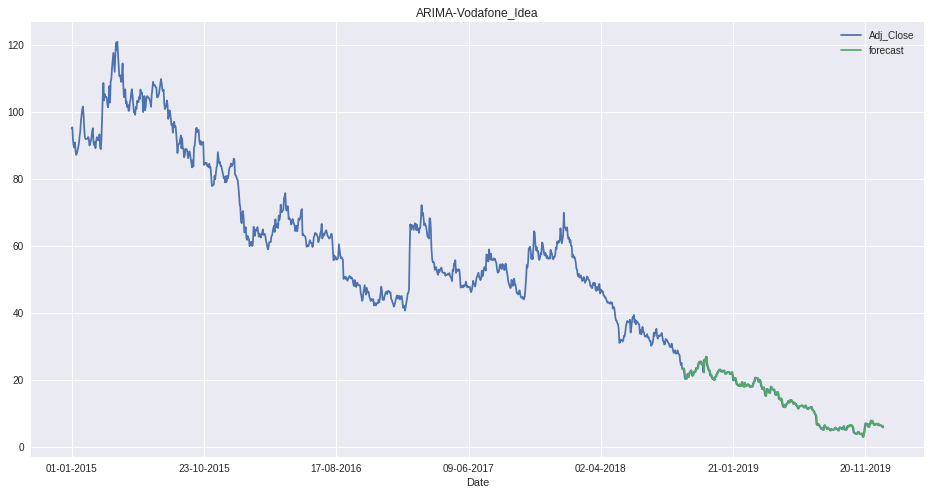

In [20]:
df['forecast']=result.predict(start=924,type='levels')
df.set_index('Date',inplace=True)
df[['Adj_Close','forecast']].plot(figsize=(16, 8))
plt.title('ARIMA-Vodafone_Idea')



### RMSE Value Calculation


In [21]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rms=sqrt(mean_squared_error(df['Adj_Close'][924:len(df)],df['forecast'][924:len(df)]))
print("RMSE=",rms)

RMSE= 0.6065696473838118
